#  Olympic Medal Leaders by Olympiad (Summer Games)
This notebook analyzes the top medalists from each Summer Olympic Games using data from Wikipedia. The original dataset is structured in a wide format, with each Olympiad as a column; reshaped into a tidy format to enable filtering, grouping, and visualization of medal trends.

Step 1: Import pandas using sample data from the Wikipedia table, create wide format dataframe, and save in csv format.                          

In [1]:
>>> import pandas as pd
data = {
    'Olympiad': ['1896 Athens', '1900 Paris', '1904 St. Louis', '1908 London', '1912 Stockholm', '1920 Antwerp'],
    'Top_Medalist': [
        'Hermann Weingärtner (GER) (3–2–1)',
        'Alvin Kraenzlein (USA) (4–0–0)',
        'Anton Heida (USA) (5–1–0)',
        'Mel Sheppard (USA) (3–0–0)',
        'Vilhelm Carlberg (SWE) (3–2–0)',
        'Willis Lee (USA) (5–1–1)'
    ],
    'Most_Golds': [
        'Carl Schuhmann (GER) (4–0–0)',
        'Alvin Kraenzlein (USA) (4–0–0)',
        'Anton Heida (USA) (5–1–0)',
        'Mel Sheppard (USA) (3–0–0)',
        'Vilhelm Carlberg (SWE) (3–2–0)',
        'Nedo Nadi (ITA) (5–0–0)'
    ]
}

df_wide = pd.DataFrame(data)

df_wide.to_csv('olympic_medalists_by_olympiad.csv', index=False)

df_wide

,Olympiad,Top_Medalist,Most_Golds
0,1896 Athens,Hermann Weingärtner (GER) (3–2–1),Carl Schuhmann (GER) (4–0–0)
1,1900 Paris,Alvin Kraenzlein (USA) (4–0–0),Alvin Kraenzlein (USA) (4–0–0)
2,1904 St. Louis,Anton Heida (USA) (5–1–0),Anton Heida (USA) (5–1–0)
3,1908 London,Mel Sheppard (USA) (3–0–0),Mel Sheppard (USA) (3–0–0)
4,1912 Stockholm,Vilhelm Carlberg (SWE) (3–2–0),Vilhelm Carlberg (SWE) (3–2–0)
5,1920 Antwerp,Willis Lee (USA) (5–1–1),Nedo Nadi (ITA) (5–0–0)


#Data cleanup and transformation: The original dataset is in a wide format, with each Olympiad as a row and medalist details embedded in strings. Data reshaped into a tidy format to extract gold, silver, and bronze counts for analysis.

Step 2: Load the csv, extract year and location, parse medal counts and convert year to integer

In [2]:
>>> df = pd.read_csv('olympic_medalists_by_olympiad.csv')
df[['Year', 'Host']] = df['Olympiad'].str.extract(r'(\d{4})\s+(.*)')
def parse_medals(s):
    if pd.isna(s): return [None, None, None]
    parts = s.split('(')[-1].strip(')').split('–')
    return [int(p) if p.isdigit() else None for p in parts]
df[['Golds', 'Silvers', 'Bronzes']] = df['Top_Medalist'].apply(parse_medals).tolist()
df['Year'] = df['Year'].astype(int)
df.head()

,Olympiad,Top_Medalist,Most_Golds,Year,Host,Golds,Silvers,Bronzes
0,1896 Athens,Hermann Weingärtner (GER) (3–2–1),Carl Schuhmann (GER) (4–0–0),1896,Athens,3,2,1
1,1900 Paris,Alvin Kraenzlein (USA) (4–0–0),Alvin Kraenzlein (USA) (4–0–0),1900,Paris,4,0,0
2,1904 St. Louis,Anton Heida (USA) (5–1–0),Anton Heida (USA) (5–1–0),1904,St. Louis,5,1,0
3,1908 London,Mel Sheppard (USA) (3–0–0),Mel Sheppard (USA) (3–0–0),1908,London,3,0,0
4,1912 Stockholm,Vilhelm Carlberg (SWE) (3–2–0),Vilhelm Carlberg (SWE) (3–2–0),1912,Stockholm,3,2,0


#Analisys: With the tidy dataset, it is possible to explore which Olympiads had the highest individual medal counts, trends in gold medal dominance, and the distribution of medals over time.

Step 3: Import matplotlib, line plot of gold medals over time, calculate total medals and bar chart total medals.                          

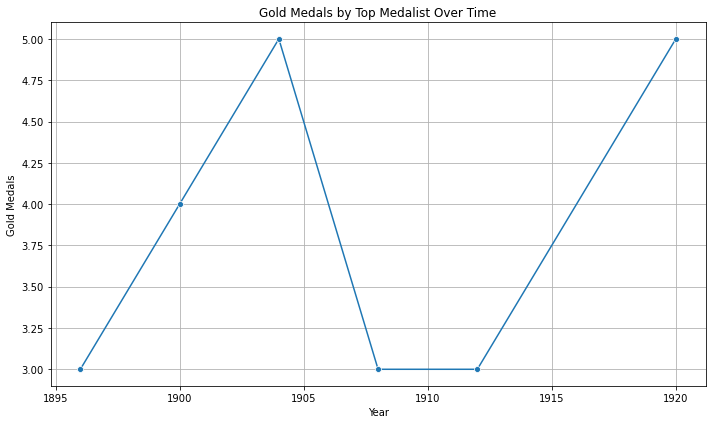

In [3]:
>>> import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Golds', marker='o')
plt.title('Gold Medals by Top Medalist Over Time')
plt.ylabel('Gold Medals')
plt.grid(True)
plt.tight_layout()
plt.show()

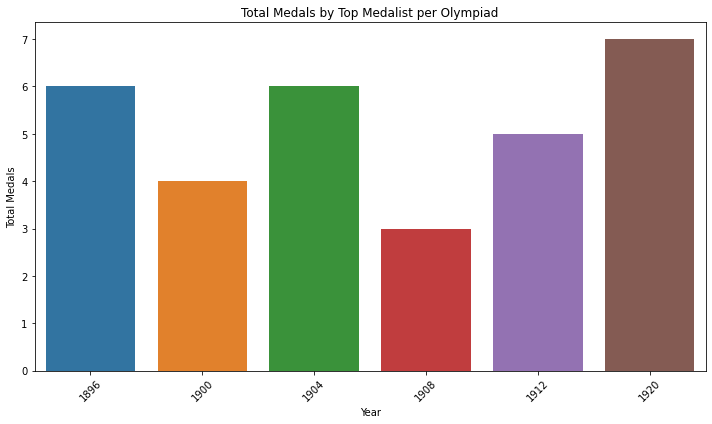

In [4]:
>>> df['Total_Medals'] = df[['Golds', 'Silvers', 'Bronzes']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Total_Medals')
plt.title('Total Medals by Top Medalist per Olympiad')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Conclusion: By tidying the dataset and extracting medal counts, it revealed trends in individual Olympic performance across Summer Games. Medal dominance varies by era, with standout athletes like Anton Heida and Willis Lee leading their Olympiads. Further analysis could be expanded by by sport, country, or gender. For instance, merge athlete nationality and sport data, compare top medalists across multiple Olympiads, extend to include Winter Games or team-based medal counts. 